# Supplementary Fig. 2a: *Xenopus tropicalis* GC landscape and tandem repeats

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##Input files:

source_data_path = 'SourceData'
sup_fig = 'Supplementary_Fig.2'


paths_files = os.path.join(source_data_path, sup_fig,sup_fig+'a')

output_TRF_RN_df_GC = os.path.join(paths_files,'XENTRv10-1_CONSENSUS_DF_nr_GC.bed')
output_TRF_TEL_df_nr = os.path.join(paths_files,'XENTRv10-1_Telomeric_Rep_DF_nr.bed')
Xtr_centrome_positions_file = os.path.join(paths_files,'Xtr_centromeric_repeats.tsv')
Nuc_content_file = os.path.join(paths_files,'GC_10kbWIN.bed')
rRNA_Xt_blast_file = os.path.join(paths_files,'Xt_5s_rRNA.blast')
Xtr_RepeatMasker_file_tRNA_snRNA = os.path.join(paths_files,'Xt_tRNA_snRNA_RepMask.bed') #Modified subset of X. tropicalis v10 Repeat Masker file

#Files provided elsewhere:
Sanger_coverage_file = os.path.join(source_data_path,'Supplementary_Fig.2','Supplementary_Fig.2f','sanger.gt2x.pb3x.v.nogap.nolt3x.mrg200.bed')
Gaps_file = os.path.join(source_data_path,'Supplementary_Fig.2','Supplementary_Fig.2f','Xentr10.gap.bed')


In [3]:

chr_sizes_files = os.path.join(paths_files,'All_Chr_lengths.tsv')

chr_sizes = pd.read_csv(chr_sizes_files, sep='\t')
chr_sizes = chr_sizes[chr_sizes.Abr=='Xtr']
chr_sizes.head()

Abr   Chr     Length
47  Xtr  Chr1  217471166
48  Xtr  Chr2  181034961
49  Xtr  Chr3  153873357
50  Xtr  Chr4  153961319
51  Xtr  Chr5  164033575

In [4]:
TRF_df_nr = pd.read_csv(output_TRF_RN_df_GC, sep='\t')
TRF_df_nr = TRF_df_nr.rename(columns={'#1_usercol':'Chr', '2_usercol':'Start','3_usercol':'End','5_pct_gc':'GC%'})
TRF_df_nr.loc[:,'Length'] = TRF_df_nr['End'] - TRF_df_nr['Start']
#TRF_df_nr['Length'] = TRF_df_nr.End - TRF_df_nr.Start
TRF_df_nr.head()

Chr  Start    End  4_pct_at       GC%  6_num_A  7_num_C  8_num_G  9_num_T  \
0  Chr1      1  10098  0.443795  0.556205     2047     2877     2739     2434   
1  Chr1  16178  16703  0.472381  0.527619      109      141      136      139   
2  Chr1  20480  20704  0.388393  0.611607       25       82       55       62   
3  Chr1  21046  23898  0.536816  0.463184      503      871      450     1028   
4  Chr1  26816  33065  0.493679  0.506321     1497     1670     1494     1588   

   10_num_N  11_num_oth  12_seq_len  Length  
0         0           0       10097   10097  
1         0           0         525     525  
2         0           0         224     224  
3         0           0        2852    2852  
4         0           0        6249    6249

In [5]:
# bedtools merge -i XENTRv10-1_Telomeric_Rep_DF.bed >XENTRv10-1_Telomeric_Rep_DF_nr.bed
TRF_df_TEL_nr = pd.read_csv(output_TRF_TEL_df_nr, sep='\t', names=['Chr','Start','End'])
TRF_df_TEL_nr['Length']= TRF_df_TEL_nr.End - TRF_df_TEL_nr.Start
TRF_df_TEL_nr.head()

Chr     Start       End  Length
0   Chr1     82261     86165    3904
1   Chr1  14842529  14843802    1273
2  Chr10        80      2404    2324
3  Chr10     15868     16858     990
4  Chr10     16985     17547     562

In [6]:
Xtrop_centromere_positon = pd.read_csv(Xtr_centrome_positions_file, sep='\t')
Xtrop_centromere_positon.head()


Specie   Chr  TandemRepeats
0    Xtr  Chr1       89200000
1    Xtr  Chr2       67500000
2    Xtr  Chr3       16700000
3    Xtr  Chr4       46600000
4    Xtr  Chr5       62000000

In [7]:
Nuc_content = pd.read_csv(Nuc_content_file, sep='\t')
Nuc_content = Nuc_content.rename(columns={'#1_usercol':'Chr','2_usercol':'Start','3_usercol':'End','5_pct_gc':'GC%'})
Nuc_content.loc[:,'Midpoint'] = Nuc_content[['End','Start']].T.mean()
Nuc_content.head()


Chr  Start    End  4_pct_at     GC%  6_num_A  7_num_C  8_num_G  9_num_T  \
0  Chr1      0  10000    0.4439  0.5561     2026     2848     2713     2413   
1  Chr1  10000  20000    0.5840  0.4160     3122     2200     1960     2718   
2  Chr1  20000  30000    0.5378  0.4622     2364     2591     2031     3014   
3  Chr1  30000  40000    0.4321  0.5679     2186     2035     3644     2135   
4  Chr1  40000  50000    0.5347  0.4653     2695     2554     2099     2652   

   10_num_N  11_num_oth  12_seq_len  Midpoint  
0         0           0       10000    5000.0  
1         0           0       10000   15000.0  
2         0           0       10000   25000.0  
3         0           0       10000   35000.0  
4         0           0       10000   45000.0

In [8]:

Sanger = pd.read_csv(Sanger_coverage_file, sep='\t', names=['Chr','Start','End', 'Length'])
Sanger.head()

Chr  Start    End  Length
0  Chr1  28100  28183      83
1  Chr1  29384  29678     294
2  Chr1  35685  35745      60
3  Chr1  36377  36396      19
4  Chr1  36934  37430     496

In [9]:
header_blast = ['query_id','Chr','pct_identity','aln_length','n_of_mismatches','gap_openings','q_start','q_end','Start','End','e_value','bit_score']

rRNA_Xt_blast = pd.read_csv(rRNA_Xt_blast_file, sep='\t', names=header_blast)
rRNA_Xt_blast.head()


query_id    Chr  pct_identity  aln_length  n_of_mismatches  gap_openings  \
0    5S_Xt  Chr10         100.0         118                0             0   
1    5S_Xt  Chr10         100.0         118                0             0   
2    5S_Xt  Chr10         100.0         118                0             0   
3    5S_Xt  Chr10         100.0         118                0             0   
4    5S_Xt  Chr10         100.0         118                0             0   

   q_start  q_end     Start       End       e_value  bit_score  
0        1    118  52414693  52414576  1.540000e-55        219  
1        1    118  52419419  52419302  1.540000e-55        219  
2        1    118  52425116  52424999  1.540000e-55        219  
3        1    118  52425380  52425263  1.540000e-55        219  
4        1    118  52425907  52425790  1.540000e-55        219

In [10]:
Gaps = pd.read_csv(Gaps_file, sep='\t',names=['Chr','Start','End','ID','s','Strand'])
Gaps.loc[:,'START'] = Gaps[['Start','End']].T.min()
Gaps.loc[:,'END'] = Gaps[['Start','End']].T.max()
Gaps.head()

Chr    Start      End          ID     s Strand    START      END
0  Chr1   157830   158830  Chr1.GAP.1  1000      +   157830   158830
1  Chr1   364960   365960  Chr1.GAP.2  1000      +   364960   365960
2  Chr1   604157   605157  Chr1.GAP.3  1000      +   604157   605157
3  Chr1  2785287  2786287  Chr1.GAP.4  1000      +  2785287  2786287
4  Chr1  4981432  4989690  Chr1.GAP.5  8258      +  4981432  4989690

In [11]:
# Load modified repeat masker (from XENTRv10-1.repeatMasked_renamed.gff original repeat masker file)
RM = pd.read_csv(Xtr_RepeatMasker_file_tRNA_snRNA, sep='\t', names=['Chr','Start','End','Class','Motif'])  
RM.head()


Chr            RM           R      Start        End   Div Strand Frame  \
0  Chr1  RepeatMasker  similarity  179794569  179795039   4.7      -     .   
1  Chr1  RepeatMasker  similarity   36535665   36536075   8.3      -     .   
2  Chr1  RepeatMasker  similarity    3531688    3532069   8.5      +     .   
3  Chr1  RepeatMasker  similarity    3532111    3532217  10.4      +     .   
4  Chr1  RepeatMasker  similarity    3618546    3618930   8.8      +     .   

                                        Descriptor  Class              Motif  
0  Target "Motif:Xtr-6_family-2442" ;class "snRNA"  snRNA  Xtr-6_family-2442  
1  Target "Motif:Xtr-6_family-2442" ;class "snRNA"  snRNA  Xtr-6_family-2442  
2  Target "Motif:Xtr-6_family-2442" ;class "snRNA"  snRNA  Xtr-6_family-2442  
3  Target "Motif:Xtr-6_family-2442" ;class "snRNA"  snRNA  Xtr-6_family-2442  
4  Target "Motif:Xtr-6_family-2442" ;class "snRNA"  snRNA  Xtr-6_family-2442

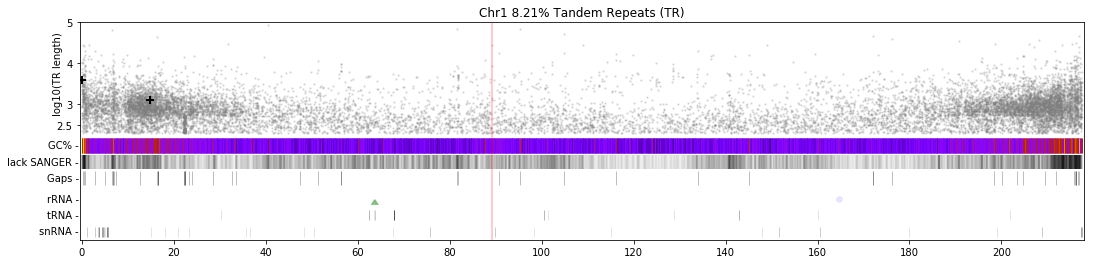

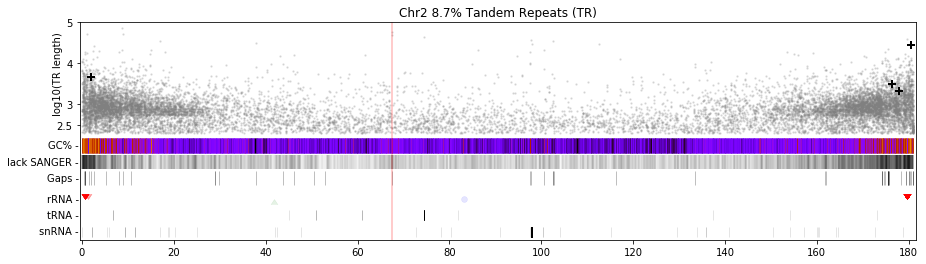

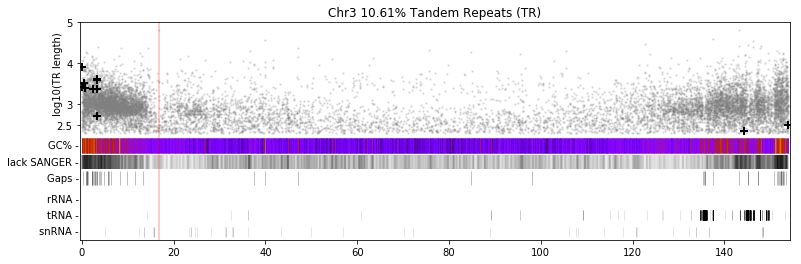

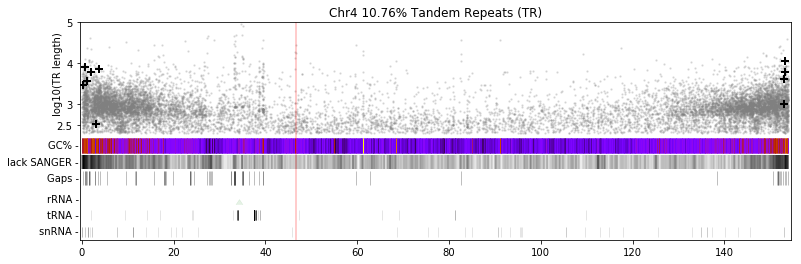

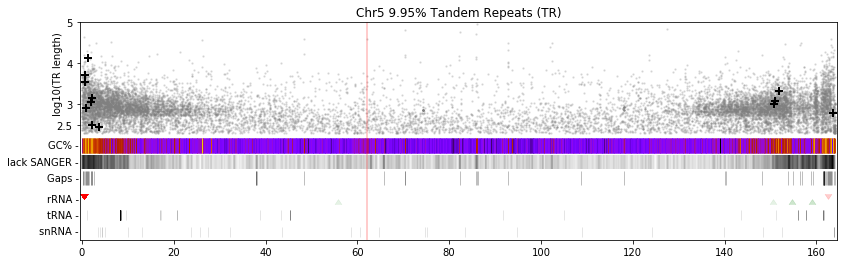

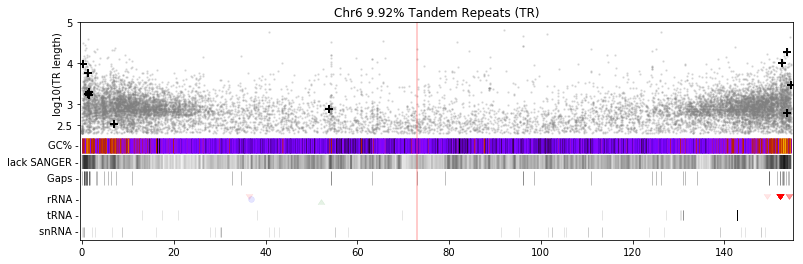

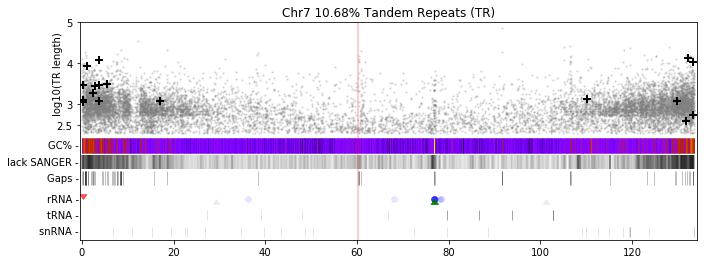

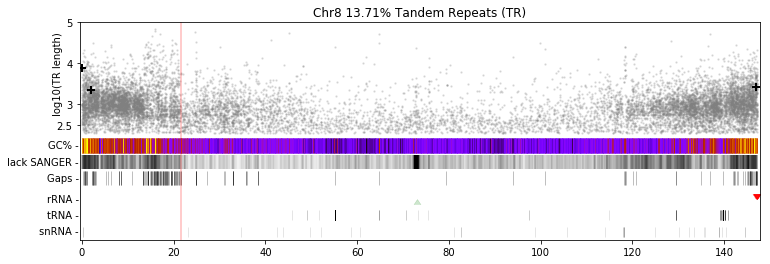

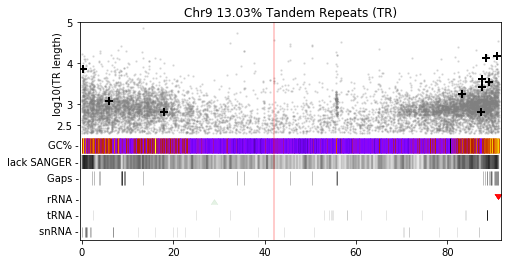

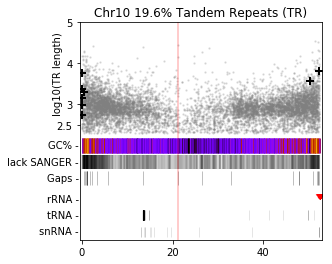

In [12]:


Mb = float(1000000)
max_chr_size_ = float(chr_sizes.Length.max())

from scipy.interpolate import make_interp_spline, BSpline


for Chr_ in chr_sizes.Chr.unique():
    
    chr_size_ = chr_sizes[chr_sizes.Chr==Chr_].Length.to_list()[0]
    Filtered_nr = TRF_df_nr[(TRF_df_nr.Chr==Chr_)]
    plt.figure(figsize=(18*chr_size_/float(max_chr_size_), 4))
    plt.ylim(-2.3,3)
    plt.yticks([0.5,1,2,3],[2.5,3,4,5]); plt.xlim(0-.5, chr_size_/Mb+.5)
    plt.text(-4.2,1.75,'log10(TR length)',va='center',ha='right', color='black', rotation=90)

    plt.xticks(np.arange(0,chr_size_, 20*Mb)/Mb)

    pct_ = ''.join((Chr_, ' ', str(np.round(100*TRF_df_nr[TRF_df_nr.Chr==Chr_].Length.sum()/ float(chr_size_),2)), '% Tandem Repeats (TR)'))
    plt.title(pct_)
   
    plt.scatter(Filtered_nr.Start/Mb, np.log10(Filtered_nr.Length)-2, s=2, alpha=0.2, color='grey')
    
    plt.scatter(TRF_df_TEL_nr[TRF_df_TEL_nr.Chr==Chr_].Start/Mb, np.log10(TRF_df_TEL_nr[TRF_df_TEL_nr.Chr==Chr_].Length)-2, s=50, alpha=1, color='black', marker="P", linewidth=0)
    
    
    plt.axvline(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats.to_list()[0]/Mb, alpha=0.2, color='red', linewidth=2)
    

    T = np.array(Nuc_content[(Nuc_content.Chr==Chr_) & (Nuc_content['10_num_N']<2000)]['Midpoint'].to_list())
    power =  np.array(Nuc_content[(Nuc_content.Chr==Chr_) & (Nuc_content['10_num_N']<2000)]['GC%'].to_list())
    xnew = np.linspace(T.min(), T.max(), len(T)/10) 
    spl = make_interp_spline(T, power, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    
    plt.scatter(xnew/Mb,  [0]*len(xnew), \
                c=(power_smooth), marker='|', \
                s=200, linewidth=1, cmap='gnuplot',  alpha=1,vmin=power_smooth.min(), vmax=power_smooth.max())
    plt.text(0,0,'GC% - ',va='center',ha='right', color='black')
        
    plt.scatter(Sanger[Sanger.Chr==Chr_].Start/Mb, len(Sanger[Sanger.Chr==Chr_].Start)*[-.4], color='black', s=200, linewidth=.15, alpha=0.1, marker='|')
    plt.text(0,-.4,'lack SANGER - ',va='center',ha='right', color='black')
    
    plt.scatter(Gaps[Gaps.Chr==Chr_].Start/Mb, len(Gaps[Gaps.Chr==Chr_].Start)*[-.8], color='black', s=200, linewidth=.5, alpha=0.5, marker='|')
    plt.text(0,-.8,'Gaps - ',va='center',ha='right', color='black')
    
    rRNA_Xt_5s = rRNA_Xt_blast[(rRNA_Xt_blast.Chr==Chr_)&  (rRNA_Xt_blast.query_id=='5S_Xt')]
    if rRNA_Xt_5s.shape[0]>0: 
        plt.scatter(rRNA_Xt_5s.Start/Mb, len(rRNA_Xt_5s.Start)*[-1.3], s=50, alpha=.1, color='red' , marker=7, linewidth=.5)
    rRNA_Xt_18s = rRNA_Xt_blast[(rRNA_Xt_blast.Chr==Chr_)&  (rRNA_Xt_blast.query_id=='18S_Xt')]
    if rRNA_Xt_18s.shape[0]>0: 
        plt.scatter(rRNA_Xt_18s.Start/Mb, len(rRNA_Xt_18s.Start)*[-1.3], s=35, alpha=.1, color='blue' , marker='o', linewidth=.5)
    rRNA_Xt_28s = rRNA_Xt_blast[(rRNA_Xt_blast.Chr==Chr_)&  (rRNA_Xt_blast.query_id=='28S_Xt')]
    if rRNA_Xt_28s.shape[0]>0: 
        plt.scatter(rRNA_Xt_28s.Start/Mb, len(rRNA_Xt_28s.Start)*[-1.3], s=50, alpha=.1, color='green' , marker=6, linewidth=.5)
    
    tRNA_X = RM[(RM.Chr==Chr_) & (RM.Class == 'tRNA')]
    if tRNA_X.shape[0]>0: 
        plt.scatter(tRNA_X.Start/Mb, len(tRNA_X.Start)*[-1.7], s=100, alpha=.1, color='black',  marker='|',linewidth=1)
    snRNA_X = RM[(RM.Chr==Chr_) & (RM.Class=='snRNA')]  # == Xtr-6_family-2442
    if snRNA_X.shape[0]>0: 
        plt.scatter(snRNA_X.Start/Mb, len(snRNA_X.Start)*[-2.1], s=100, alpha=.1, color='black', marker='|',linewidth=1)
    plt.text(0,-1.3,'rRNA - ',va='center',ha='right', color='black')
    plt.text(0,-1.7,'tRNA - ',va='center',ha='right', color='black')
    plt.text(0,-2.1,'snRNA - ',va='center',ha='right', color='black')
        
    plt.tight_layout()
    out_fig_name = os.path.join(source_data_path, sup_fig, sup_fig+'a_'+Chr+'.png')
    print("Saved as", out_fig_name)
    plt.savefig(out_fig_name,bbox_inches='tight', transparent=True)

    plt.show()
    